In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('./telecom_churn.csv')

In [36]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
df.shape

(3333, 20)

## Whole dataset visualizations

In [38]:
df["International plan"] = (df["International plan"]=="Yes").astype("int")

In [39]:
df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})
df["Churn"] = df["Churn"].astype(int)

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


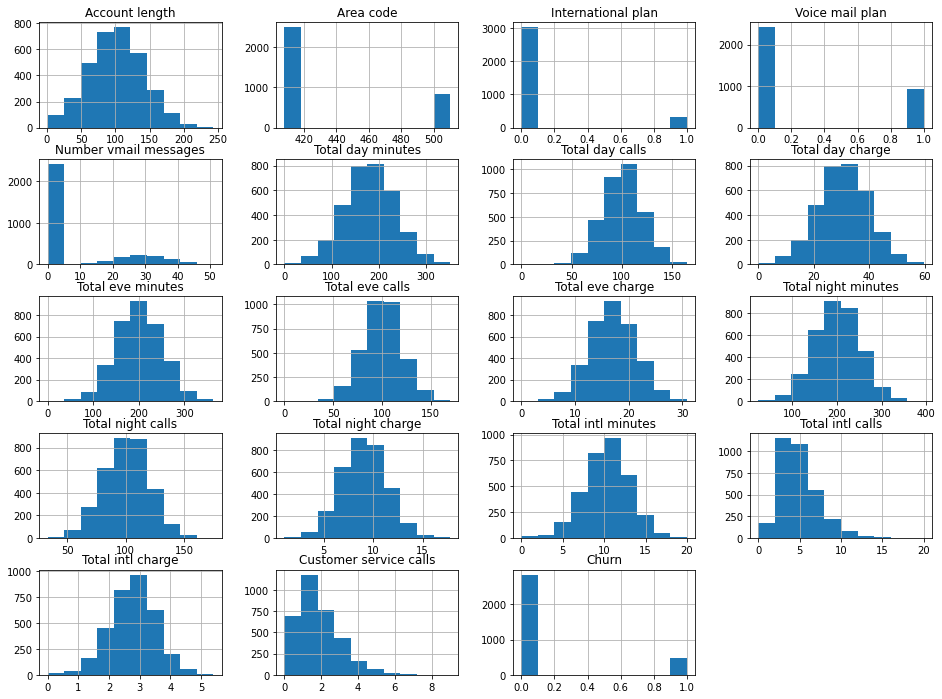

In [40]:
ax = plt.gca()
plt.gcf().set_size_inches(16, 12)
df.drop(columns="State").hist(ax=ax);

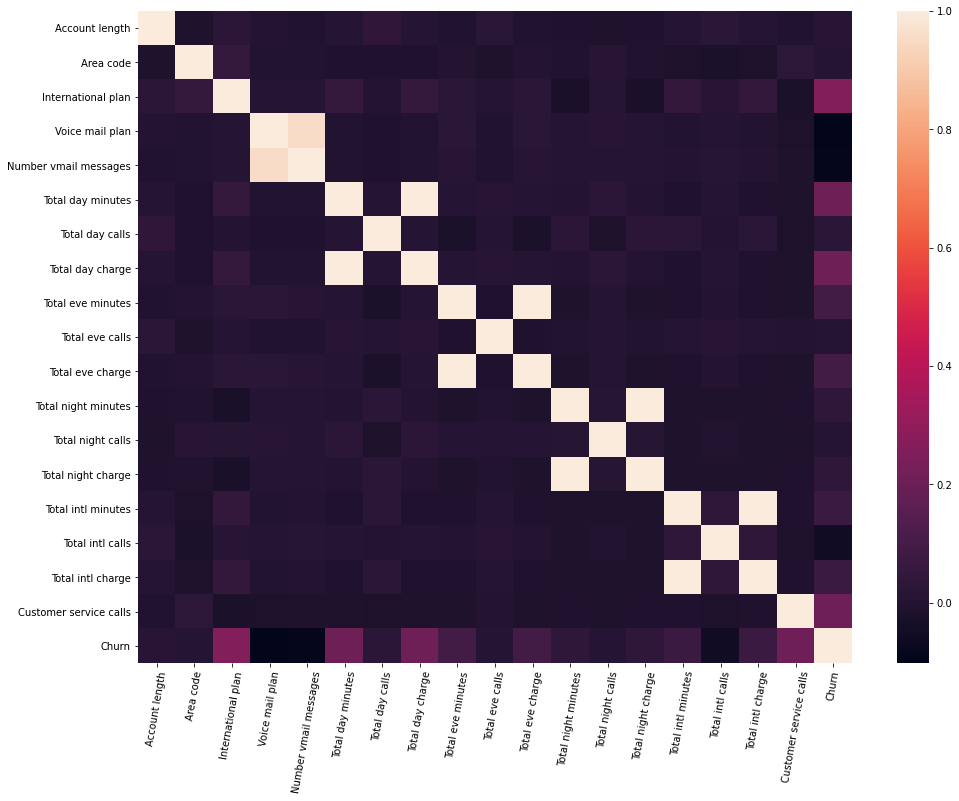

In [47]:
ax = sns.heatmap(df.corr())
plt.gcf().set_size_inches(16, 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

In [49]:
list(filter(lambda x: "charge" in x, df.columns))

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [58]:
#drop the columns regarding charge values
df.drop(columns=list(filter(lambda x: "charge" in x, df.columns)) +["State"], inplace=True)

In [59]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [60]:
from sklearn.manifold import TSNE

In [61]:
tsne = TSNE(random_state=17)

In [62]:
X_repr = tsne.fit_transform(df)

In [63]:
X_repr

array([[-32.994804,  54.896915],
       [-31.593481,   9.463764],
       [ 32.784893,  59.016056],
       ...,
       [ 23.332415, -84.963234],
       [ 15.262901, -70.12702 ],
       [-32.499615,  41.266075]], dtype=float32)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(df)

array([[-86.70194757,  32.59545608],
       [ 16.48293763,  38.43196258],
       [-59.6890891 ,  39.44489369],
       ...,
       [ -2.6277867 , -74.98435463],
       [-30.31206717,  -7.53619278],
       [-58.38496878, -23.1524731 ]])

In [67]:
pca.explained_variance_

array([2968.71434597, 2598.45411469])

In [68]:
pca.explained_variance_ratio_

array([0.23078758, 0.20200358])

## Features one at a time

In [69]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

<AxesSubplot:xlabel='Total day minutes'>

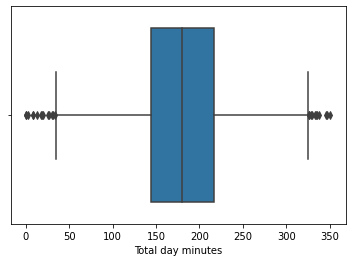

In [70]:
sns.boxplot(x="Total day minutes", data=df)

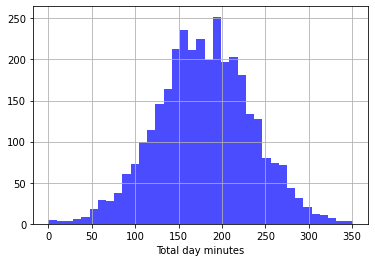

In [98]:
sns.distplot(a=df["Total day minutes"], hist=True, kde=False, hist_kws={"color":"blue", "alpha":0.7})
plt.gca().grid(True)

## Categorical

In [103]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [105]:
states = pd.read_csv('telecom_churn.csv')["State"]

In [107]:
states.nunique()

51

In [109]:
states.value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [110]:
states.nunique()

51

<AxesSubplot:xlabel='Churn', ylabel='count'>

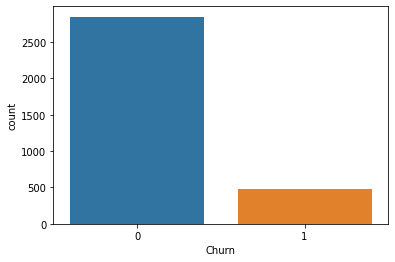

In [111]:
sns.countplot(x="Churn", data=df)

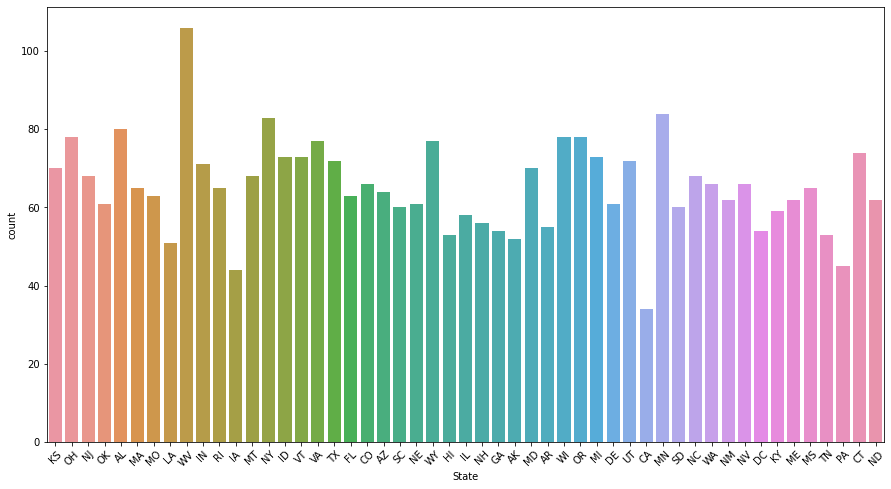

In [117]:
ax = sns.countplot(states)
plt.gcf().set(figwidth=15, figheight=8)
plt.xticks(rotation=45);

## Interaction between features

### Numeric-numeric

In [122]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [123]:
df.corrwith(df["Total day minutes"])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

In [130]:
pd.crosstab(df["Churn"], df["Customer service calls"], values=df["Total intl calls"], aggfunc="mean")

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,4.489256,4.533522,4.526786,4.602597,4.600000,4.500,4.125000,5.0,4.0,NaN
1,4.152174,4.622951,4.080460,3.636364,3.947368,4.375,2.857143,4.4,8.0,2.5


In [134]:
df[(df["Churn"] == 0) & (df["Customer service calls"] == 0)]

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
5,118,510,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0
7,147,415,1,0,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0
9,141,415,1,1,37,258.6,84,222.0,111,326.4,97,11.2,5,0,0
11,74,415,0,0,0,187.7,127,163.4,148,196.0,94,9.1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,127,510,0,0,0,107.9,128,187.0,77,218.5,95,0.0,0,0,0
3293,95,408,0,0,0,160.0,133,215.3,98,188.9,87,9.1,4,0,0
3315,149,415,0,1,18,148.5,106,114.5,106,178.3,98,6.5,4,0,0
3316,103,510,0,1,29,164.1,111,219.1,96,220.3,108,12.3,9,0,0


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

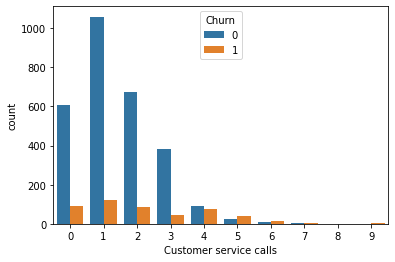

In [136]:
sns.countplot(x="Customer service calls", data=df, hue="Churn")

In [138]:
df.groupby(by="Churn")[['Total day minutes',
                   'Customer service calls']].agg([np.std, np.median])

Total day minutes        Customer service calls       
                    std median                    std median
Churn                                                       
0             50.181655  177.2               1.163883      1
1             68.997792  217.6               1.853275      2

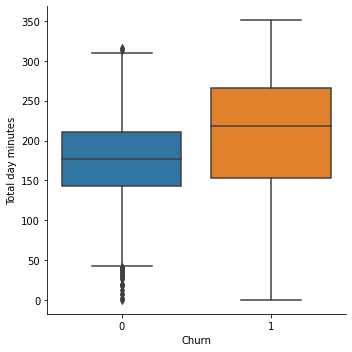

In [148]:
sns.catplot(x="Churn", y="Total day minutes", data=df,  kind="box")

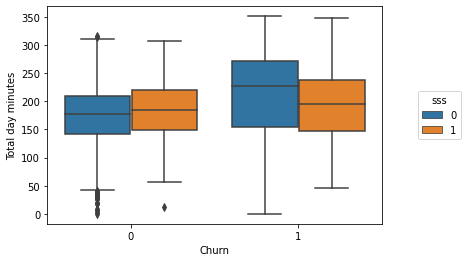

In [159]:
ax = sns.boxplot(x="Churn", y="Total day minutes", data=df, hue="International plan")
ax.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1, title="sss")